In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime 

In [2]:
#defino path
path=r'/Users/carolinbillet/Documents/CoastSat-master'
#abro doc de marea del SHN
df=pd.read_csv(path+r'/Marea-MdP-SHN.csv',header=None,names=['año','mes','dia','hora','tide'])
df.head()

,año,mes,dia,hora,tide
0,1986,1,4,13:00,187.0
1,1986,1,4,14:00,181.0
2,1986,1,4,15:00,163.0
3,1986,1,4,16:00,138.0
4,1986,1,4,17:00,112.0


In [5]:
#convierto fechas a formato datetime, formato ISO, uso horario UTC=0 (GMT) = datos satelitales
#tiempo inicial 1er fila hasta el largo de archivo con frecuencia horaria 
a=datetime.datetime(1986,1,4,0).replace(tzinfo=datetime.timezone.utc).isoformat()
dates=pd.date_range(a,periods=len(df),freq='H')
#Saco media para llevar los niveles a 0 (tienen una referencia en la base del mareografo)
msl=np.mean(df.tide)
t=df.tide-msl
#paso de cm a m y redondeo a 3 decimales
t=(t/100).round(3)
#convierto t en dataframe y le pongo la variable dates de indice
t=pd.DataFrame(t)
t=t.set_index(dates)
t.head()

t.to_csv('MareaFinal-MdP-SHN.csv')

TypeError: function missing required argument 'year' (pos 1)

/opt/anaconda3/envs/coastsat/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


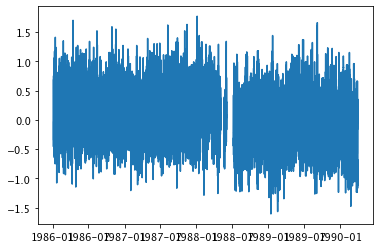

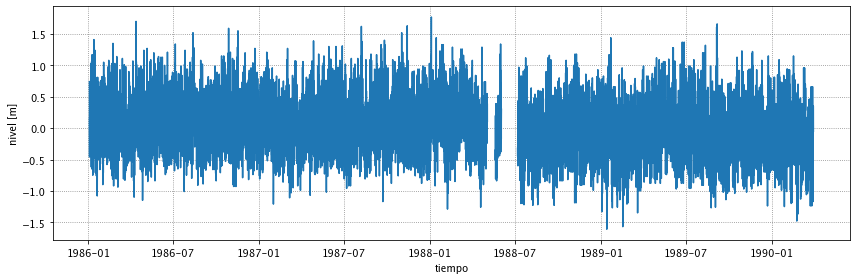

In [4]:
plt.plot(t)
fig, ax=plt.subplots(1,1,figsize=(12,4))
ax.plot(t)
ax.set(xlabel="tiempo", ylabel="nivel [m]")
ax.grid(color='grey',linestyle=':')
plt.tight_layout()
#save figure
#plt.savefig(path+r'\figura_niveles.png',dpi=300)